<a href="https://colab.research.google.com/github/herfandinoviutami/Correlation-based-rx-notebook/blob/main/02_Plate_YoloV8_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jlqvTrnc1teS9gaYyuPr")
project = rf.workspace("myplat").project("indonesian-plate-model")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 16.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
!yolo task=detect mode=train epochs=10 data=/content/Plate_YoloV8_model-4/data.yaml model=yolov8n.pt imgsz=640 batch=8

100% 6.23M/6.23M [00:00<00:00, 359MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Plate_YoloV8_model-4/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

In [9]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')

model.info()

Model summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

In [20]:
#test
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt show=False conf=0.5 source=/content/H5778QB.jpg save=True


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/H5778QB.jpg: 480x640 1 license-plate, 57.6ms
Speed: 3.7ms preprocess, 57.6ms inference, 563.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


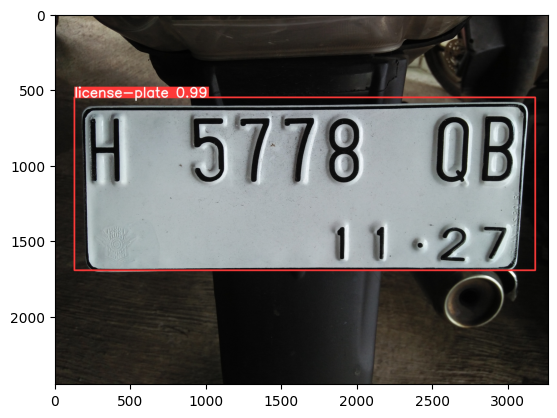

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = '/content/runs/detect/predict8/H5778QB.jpg'

# Load and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()


In [23]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt  show=True conf=0.5 source=/content/plat.avi


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/320) /content/plat.avi: 384x640 1 license-plate, 88.0ms
video 1/1 (frame 2/320) /content/plat.avi: 384x640 1 license-plate, 6.8ms
video 1/1 (frame 3/320) /content/plat.avi: 384x640 1 license-plate, 6.0ms
video 1/1 (frame 4/320) /content/plat.avi: 384x640 1 license-plate, 6.2ms
video 1/1 (frame 5/320) /content/plat.avi: 384x640 1 license-plate, 6.0ms
video 1/1 (frame 6/320) /content/plat.avi: 384x640 1 license-plate, 5.8ms
video 1/1 (frame 7/320) /content/plat.avi: 384x640 1 license-plate, 5.8ms
video 1/1 (frame 8/320) /content/plat.avi: 384x640 1 license-plate, 5.9ms
video 1/1 (frame 9/320) /content/plat.avi: 384x640 1 license-plate, 9.9ms
video 1/1 (frame 10/320) /content/plat.avi: 384x640 1 license-plate, 7.3ms
video 1/1 (frame 

In [28]:
from google.colab import files


In [29]:
!zip -r Plate_YoloV8_model-4.zip /content/Plate_YoloV8_model-4
files.download('Plate_YoloV8_model-4.zip')

  adding: content/Plate_YoloV8_model-4/ (stored 0%)
  adding: content/Plate_YoloV8_model-4/valid/ (stored 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/ (stored 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/B5957BGO_jpg.rf.f23a1dbc7fde087486e46673986a6e1e.jpg (deflated 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/H2246HI_jpg.rf.6b9bc99db06f369a7c843e6092ebe7d8.jpg (deflated 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/H6240KK_jpg.rf.e371967981fcb63462abb552250de614.jpg (deflated 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/H3320FK_jpg.rf.74719d4ac46cea825b53300b39b7e888.jpg (deflated 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/H4566VF_jpg.rf.3aa8d1d162ecf6694b28e9e81d568129.jpg (deflated 0%)
  adding: content/Plate_YoloV8_model-4/valid/images/H5031DK_jpg.rf.2de2ca4107f926cae3ad9b2b2b715999.jpg (deflated 1%)
  adding: content/Plate_YoloV8_model-4/valid/images/H2980AF_jpg.rf.a7b45cc35caea8fcc7e292c451662ece.jpg (deflated 0%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!zip -r runs.zip /content/runs
files.download('runs.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/02.jpg (deflated 4%)
  adding: content/runs/detect/predict8/ (stored 0%)
  adding: content/runs/detect/predict8/H5778QB.jpg (deflated 1%)
  adding: content/runs/detect/predict7/ (stored 0%)
  adding: content/runs/detect/predict7/H5778QB.jpg (deflated 1%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/01.jpg (deflated 4%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/F1_curve.png (deflated 18%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 5%)
  adding: content/runs/detect/train

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from google.colab import files
files.download('/content/yolov8n.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>